In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'../data/processed/data.csv')

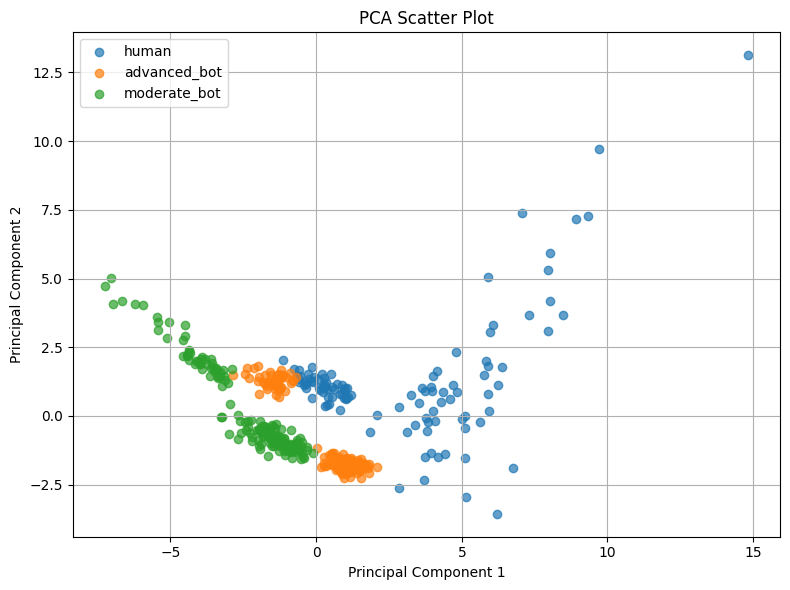

In [ ]:
# Separate features and labels
X = df[[column for column in list(df.columns) if column != 'label' and column != 'session_id' and column != 'url' and column != 'referrer']]
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2, svd_solver='full')
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Plot
plt.figure(figsize=(8, 6))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{label}', alpha=0.7)

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()